# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorther... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2023-10-02 14:52:05.682231: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


## Creating data to view and fit

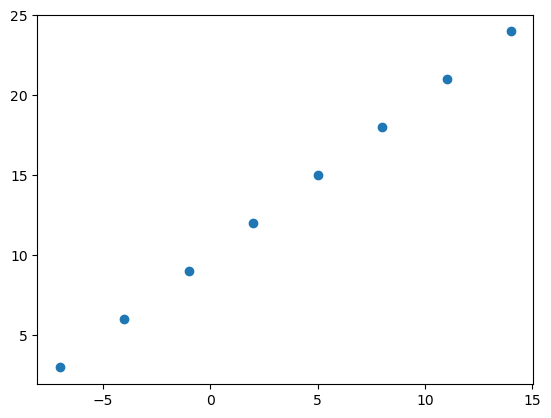

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2023-10-02 14:52:09.542992: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

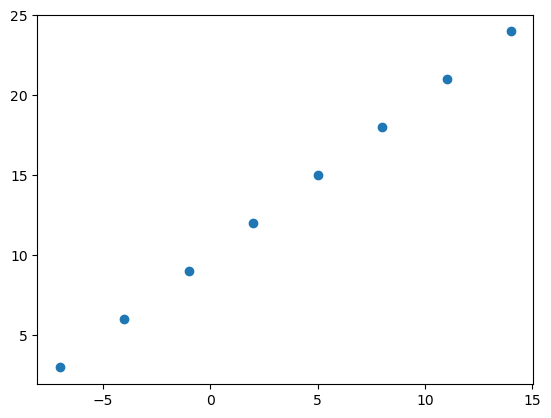

In [12]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [13]:
# # Optionally, the first layer can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))
#
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16, )))
# ...
#
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochstic gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5) # This line will error if you're running TensorFlow 2.7.0+!
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 446ms/step - loss: 18.9493 - mae: 18.9493
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 18.6681 - mae: 18.6681
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 18.3868 - mae: 18.3868
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 18.1056 - mae: 18.1056
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 17.8243 - mae: 17.8243


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 92ms/step


array([[-15.573973]], dtype=float32)

In [17]:
y_pred + 9

array([[-6.5739727]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [18]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 12.1923 - mae: 12.1923
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0598 - mae: 12.0598
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9273 - mae: 11.9273
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7948 - mae: 11.7948
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6623 - mae: 11.6623
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5298 - mae: 11.5298
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3973 - mae: 11.3973
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2648 - mae: 11.2648
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1323 - mae: 11.1323
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9998 - mae: 10.9998
Epoch 11/100
1/1 [==============================] - 0s 6m

In [19]:
# Reminder ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 55ms/step


array([[29.806467]], dtype=float32)

In [21]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 604ms/step - loss: 13.7153 - mae: 13.7153
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 13.0046 - mae: 13.0046
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2963 - mae: 12.2963
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5880 - mae: 11.5880
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8762 - mae: 10.8762
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1577 - mae: 10.1577
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 9.4296 - mae: 9.4296
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.6893 - mae: 8.6893
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9339 - mae: 7.9339
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 7.1605 - mae: 7.1605
Epoch 11/100
1/1 [==============================] - 0s 11ms/s

In [22]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Let's  try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[25.971937]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```



When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions od a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

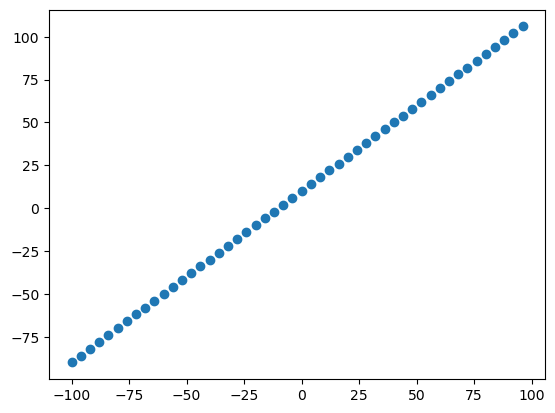

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of total data you have available.
* **Validation set** - the model gets tuned oh this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data

Now we've got our data in training and test sets... let's visualize it again!

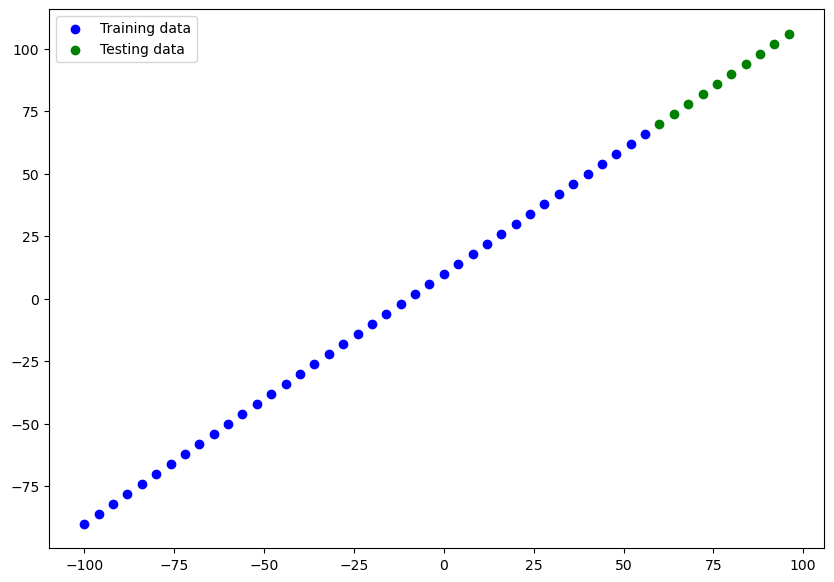

In [29]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [31]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2).

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary`.

In [35]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [36]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


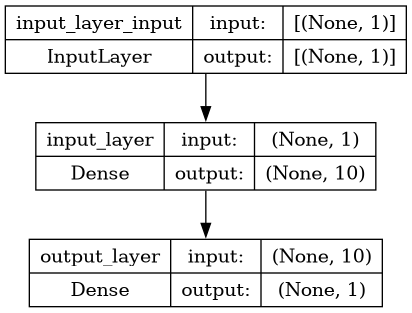

In [37]:
# from tensorflow.keras.utils import plot_model
# plot_model(model)
tf.keras.utils.plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [38]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[ 91.153275],
       [ 97.106445],
       [103.05963 ],
       [109.01281 ],
       [114.96599 ],
       [120.919174],
       [126.872345],
       [132.82553 ],
       [138.7787  ],
       [144.7319  ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into function.

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """

    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

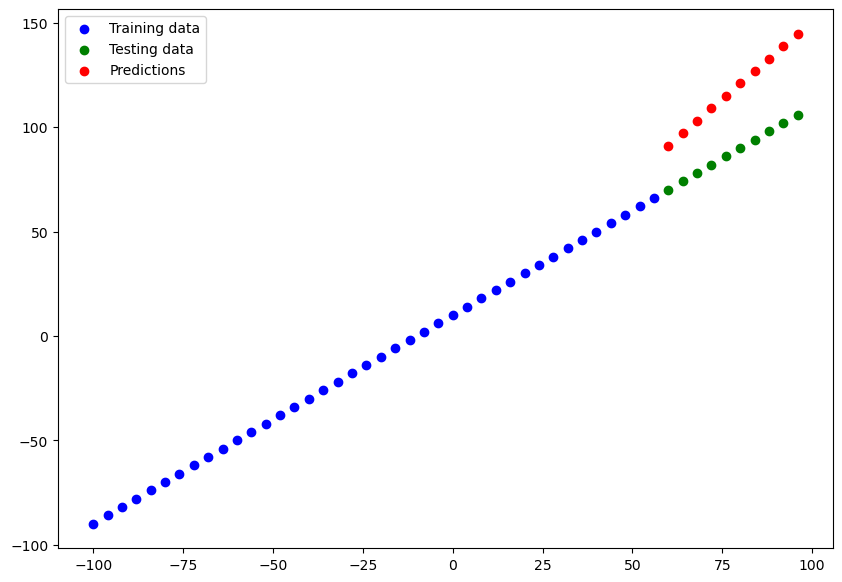

In [41]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regresion, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 121ms/step - loss: 29.9426 - mae: 29.9426


[29.942577362060547, 29.942577362060547]

In [43]:
# Calculate the mean absolute error (wrong output)
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.230655, 12.042578, 15.647705, 21.01281 , 26.965988, 32.919174,
       38.872345, 44.82553 , 50.7787  , 56.731903], dtype=float32)>

In [44]:
y_pred

array([[ 91.153275],
       [ 97.106445],
       [103.05963 ],
       [109.01281 ],
       [114.96599 ],
       [120.919174],
       [126.872345],
       [132.82553 ],
       [138.7787  ],
       [144.7319  ]], dtype=float32)

In [45]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 91.153275],
       [ 97.106445],
       [103.05963 ],
       [109.01281 ],
       [114.96599 ],
       [120.919174],
       [126.872345],
       [132.82553 ],
       [138.7787  ],
       [144.7319  ]], dtype=float32)>

In [46]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 91.153275,  97.106445, 103.05963 , 109.01281 , 114.96599 ,
       120.919174, 126.872345, 132.82553 , 138.7787  , 144.7319  ],
      dtype=float32)>

In [47]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [48]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.942577>

In [49]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=928.0311>

In [50]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longger - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.6704 - mae: 27.6704
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 8.8489 - mae: 8.8489
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 9.7131 - mae: 9.7131
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8637 - mae: 11.8637
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9301 - mae: 10.9301
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1000 - mae: 10.1000
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1292 - mae: 9.1292
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0993 - mae: 9.0993
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 15.1203 - mae: 15.1203
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5599 - mae: 7.5599
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - los

1/1 [==============================] - 0s 50ms/step


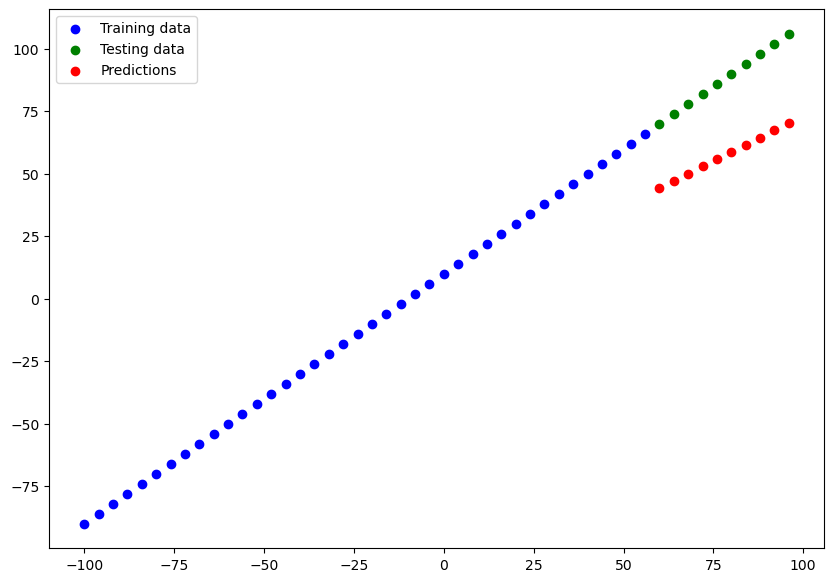

In [52]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [53]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[44.36214 ],
        [47.23287 ],
        [50.103596],
        [52.97432 ],
        [55.845047],
        [58.71577 ],
        [61.5865  ],
        [64.45722 ],
        [67.32795 ],
        [70.19868 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.36214 , 47.23287 , 50.103596, 52.97432 , 55.845047, 58.71577 ,
        61.5865  , 64.45722 , 67.32795 , 70.19868 ], dtype=float32)>)

In [54]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.719593>,
 <tf.Tensor: shape=(), dtype=float32, numpy=954.2142>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [55]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 18ms/step - loss: 71.6396 - mae: 71.6396
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 10.6809 - mae: 10.6809
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 25.4010 - mae: 25.4010
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 13.0687 - mae: 13.0687
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 14.3825 - mae: 14.3825
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 11.4854 - mae: 11.4854
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 12.5251 - mae: 12.5251
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9967 - mae: 10.9967
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 39.1755 - mae: 39.1755
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 26.7334 - mae: 26.7334
Epoch 11/100
2/2 [==============================] - 

1/1 [==============================] - 0s 66ms/step


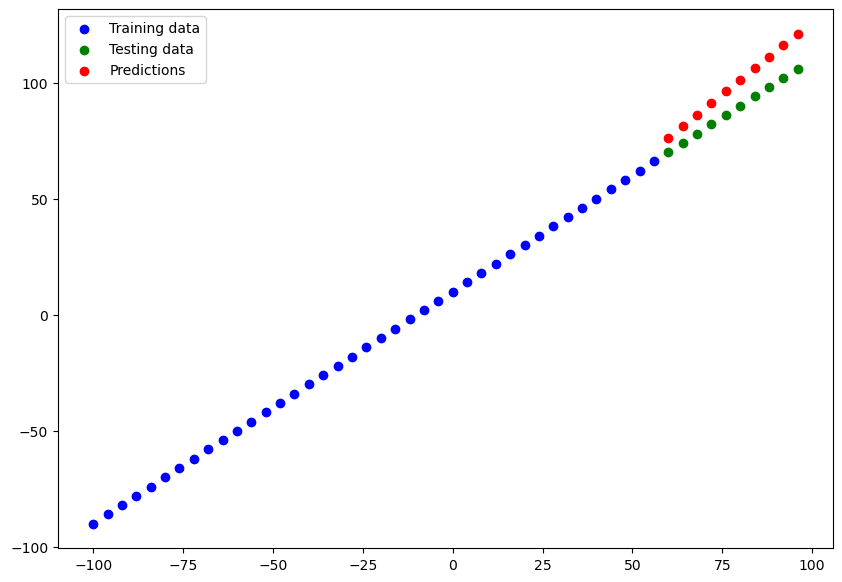

In [56]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [57]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.618171>,
 <tf.Tensor: shape=(), dtype=float32, numpy=120.49257>)

**Build `model_3`**

* 2 dense layers, trained for 500 epochs

In [58]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 43ms/step - loss: 55.7381 - mae: 55.7381
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 39.0293 - mae: 39.0293
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 33.5513 - mae: 33.5513
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 17.2542 - mae: 17.2542
Epoch 5/500
2/2 [==============================] - 0s 14ms/step - loss: 22.7234 - mae: 22.7234
Epoch 6/500
2/2 [==============================] - 0s 15ms/step - loss: 12.1105 - mae: 12.1105
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 13.2876 - mae: 13.2876
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 11.3122 - mae: 11.3122
Epoch 9/500
2/2 [==============================] - 0s 14ms/step - loss: 42.5648 - mae: 42.5648
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 29.6918 - mae: 29.6918
Epoch 11/500
2/2 [==============================] - 0s

1/1 [==============================] - 0s 48ms/step


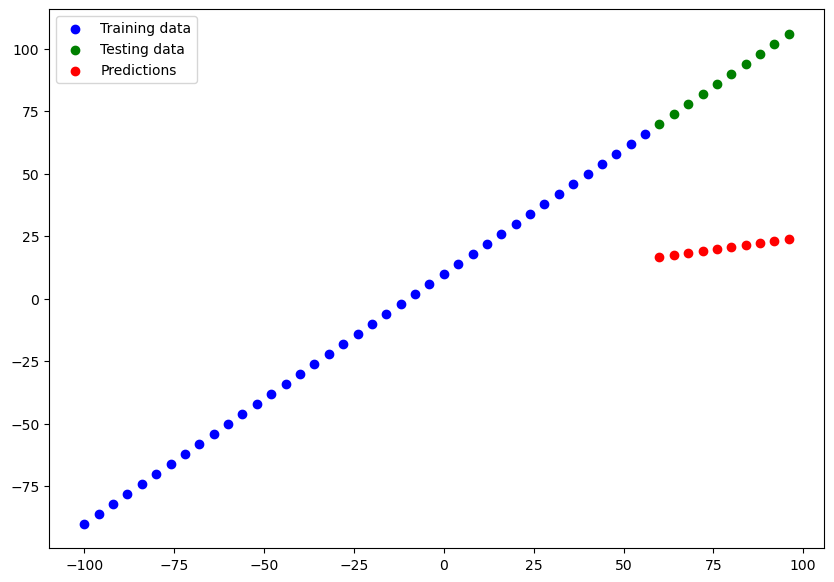

In [59]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [60]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.62519>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4657.2764>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and than increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [61]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.719593,954.214172
1,model_2,10.618171,120.492569
2,model_3,67.625191,4657.276367


In [62]:
### Look like `model_2` performed best (maybe)

In [63]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


:key **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving your models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save or model's too:
1. The SaveModel Format
2. The HDF5 format

In [64]:
# Save model using the SaveModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [65]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in saved model

In [66]:
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test);
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 27ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [76]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [77]:
# Load in model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 77ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger Example

In [79]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [80]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# Read in the insurance dataset
insurance = pd.read_csv('Dataset/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [82]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [87]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
